<a href="https://colab.research.google.com/github/mbrandino/Alura_aula_4.3/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


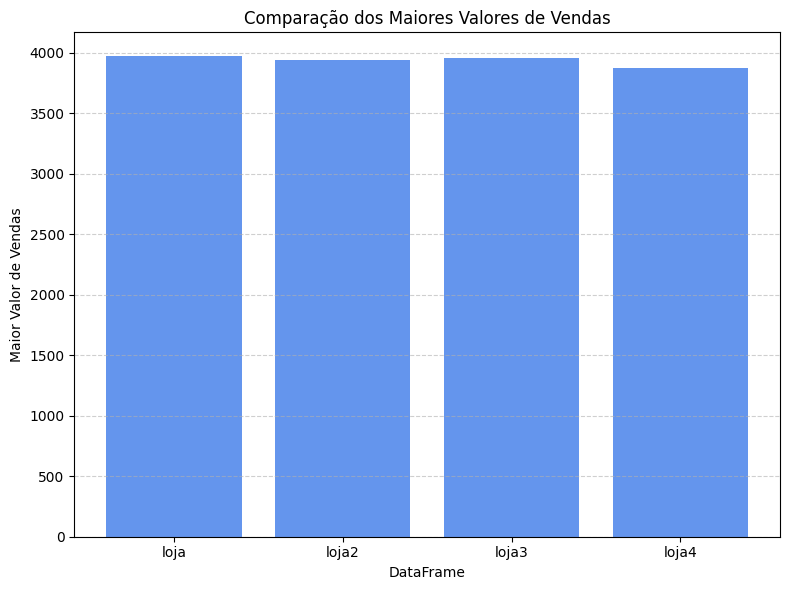

In [4]:
import matplotlib.pyplot as plt

# Nomes dos dataframes para exibição no gráfico
nomes = ['loja', 'loja2', 'loja3', 'loja4']

# Lista com os DataFrames já carregados
dataframes = [loja, loja2, loja3, loja4]

# Obtendo os maiores valores de vendas de cada DataFrame
maiores_valores = [df['Preço'].max() for df in dataframes]

# Criando gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(nomes, maiores_valores, color='cornflowerblue')
plt.title('Comparação dos Maiores Valores de Vendas')
plt.xlabel('DataFrame')
plt.ylabel('Maior Valor de Vendas')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Exibindo o gráfico
plt.show()


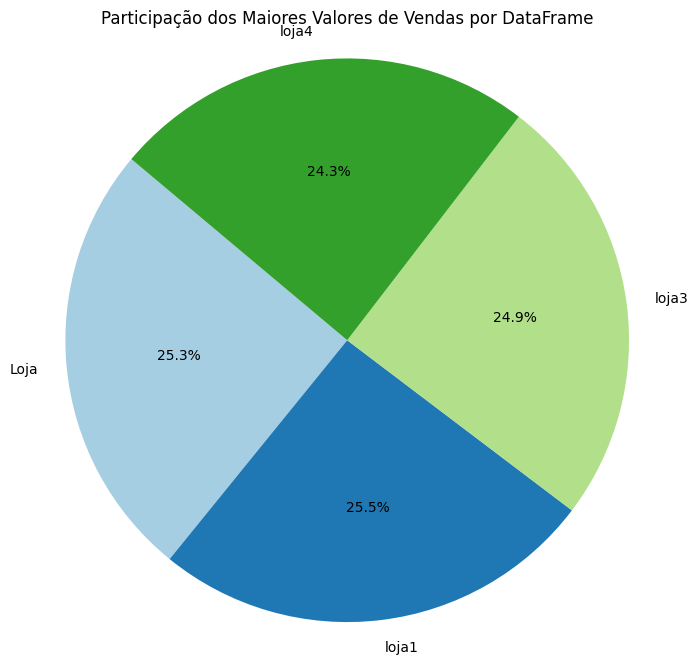

In [9]:
import matplotlib.pyplot as plt

# Nomes para os rótulos do gráfico
nomes = ['Loja', 'loja1', 'loja3', 'loja4']

# Lista com os DataFrames já carregados no notebook
dataframes = [loja, loja2, loja3, loja4]

# Extração do maior valor de vendas de cada DataFrame
maiores_valores_produtos = [df['Produto'].max() for df in dataframes]

# Criando gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(maiores_valores, labels=nomes, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Participação dos Maiores Valores de Vendas por DataFrame')
plt.axis('equal')  # Para manter o gráfico como um círculo

# Exibir gráfico
plt.show()


# 2. Vendas por Categoria


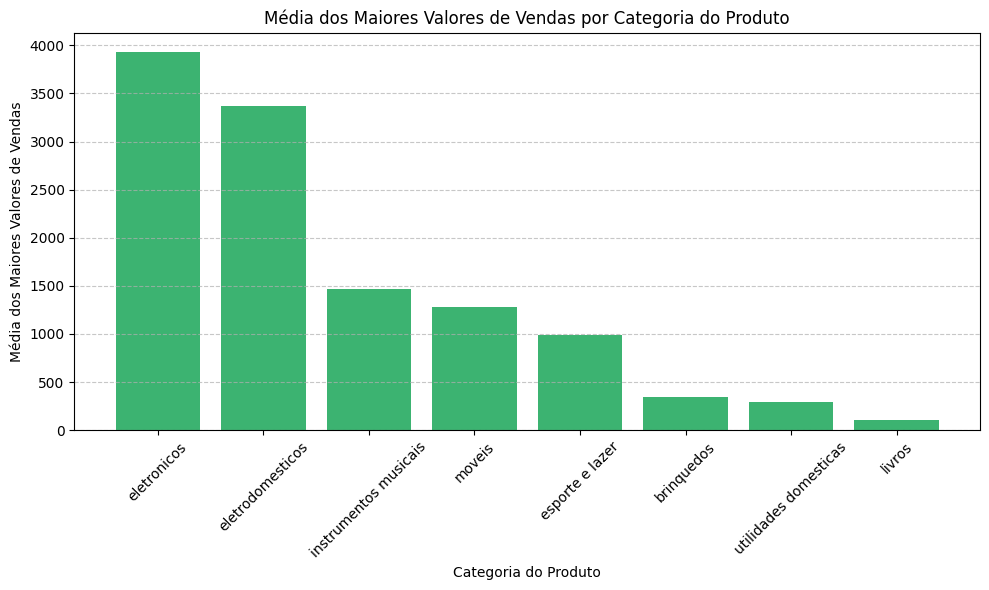

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista dos DataFrames já carregados
dataframes = [loja, loja2, loja3, loja4]

# Dicionário para acumular os maiores valores por categoria
maiores_por_categoria = {}

# Iterar sobre os DataFrames
for df in dataframes:
    # Agrupar por categoria e pegar o maior valor de vendas de cada grupo
    maiores = df.groupby('Categoria do Produto')['Preço'].max()

    # Acumular os valores por categoria
    for categoria, valor in maiores.items():
        if categoria not in maiores_por_categoria:
            maiores_por_categoria[categoria] = []
        maiores_por_categoria[categoria].append(valor)

# Calcular a média dos maiores valores por categoria
media_maiores = {cat: sum(vals)/len(vals) for cat, vals in maiores_por_categoria.items()}

# Converter em DataFrame para facilitar o plot
media_df = pd.DataFrame(list(media_maiores.items()), columns=['Categoria do Produto', 'Média dos Maiores Valores'])

# Ordenar para visualização mais clara
media_df = media_df.sort_values(by='Média dos Maiores Valores', ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(media_df['Categoria do Produto'], media_df['Média dos Maiores Valores'], color='mediumseagreen')
plt.title('Média dos Maiores Valores de Vendas por Categoria do Produto')
plt.xlabel('Categoria do Produto')
plt.ylabel('Média dos Maiores Valores de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()


# 3. Média de Avaliação das Lojas

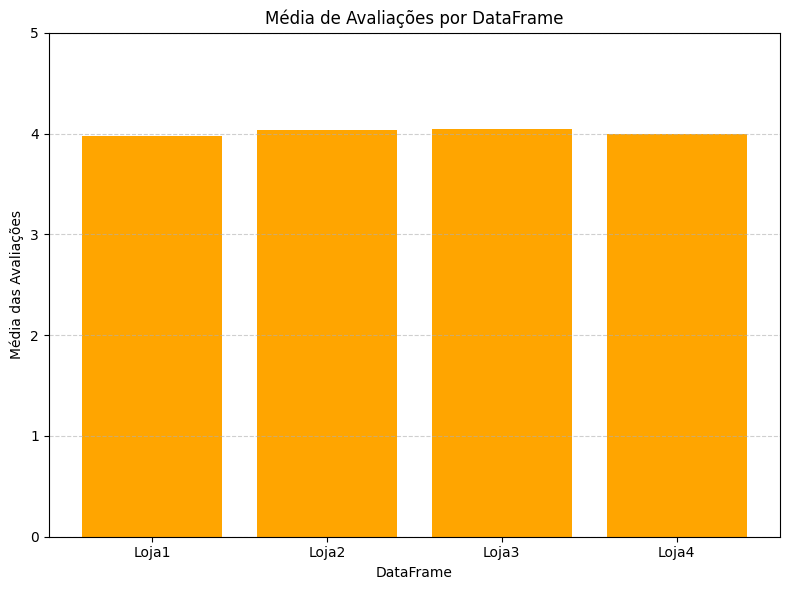

In [13]:
import matplotlib.pyplot as plt

# Lista de DataFrames e seus rótulos
dataframes = [loja, loja2, loja3, loja4]
nomes = ['Loja1', 'Loja2', 'Loja3', 'Loja4']

# Calculando a média da coluna 'avaliacao' para cada DataFrame
medias_avaliacao = [df['Avaliação da compra'].mean() for df in dataframes]

# Criando gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(nomes, medias_avaliacao, color='orange')
plt.title('Média de Avaliações por DataFrame')
plt.xlabel('DataFrame')
plt.ylabel('Média das Avaliações')
plt.ylim(0, 5)  # supondo que a escala de avaliação vai até 5
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Exibir gráfico
plt.show()


# 4. Produtos Mais e Menos Vendidos

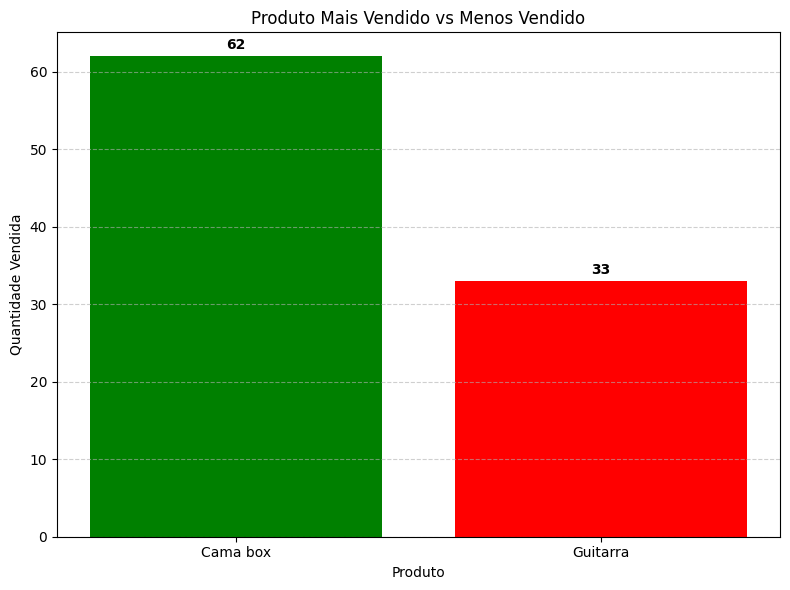

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que seu DataFrame já está carregado como df

# Contar a frequência de vendas por produto
contagem_produtos = df['Produto'].value_counts()

# Identificar o produto mais vendido e o menos vendido
produto_mais_vendido = contagem_produtos.idxmax()
produto_menos_vendido = contagem_produtos.idxmin()

# Criar um DataFrame com os dois para plotagem
dados_plot = contagem_produtos[[produto_mais_vendido, produto_menos_vendido]]

# Gráfico de colunas
plt.figure(figsize=(8, 6))
plt.bar(dados_plot.index, dados_plot.values, color=['green', 'red'])
plt.title('Produto Mais Vendido vs Menos Vendido')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar valores no topo das colunas
for i, valor in enumerate(dados_plot.values):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontweight='bold')

# Exibir gráfico
plt.show()


# 5. Frete Médio por Loja


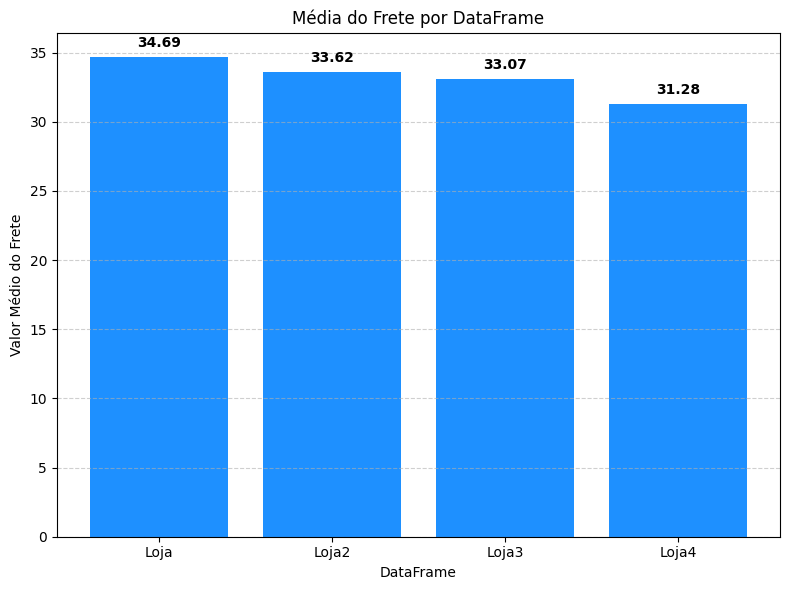

In [20]:
import matplotlib.pyplot as plt

# Lista dos DataFrames e seus nomes
dataframes = [loja, loja2, loja3, loja4]
nomes = ['Loja', 'Loja2', 'Loja3', 'Loja4']

# Calcular média dos fretes
medias_frete = [df['Frete'].mean() for df in dataframes]

# Criar gráfico de colunas
plt.figure(figsize=(8, 6))
plt.bar(nomes, medias_frete, color='dodgerblue')
plt.title('Média do Frete por DataFrame')
plt.xlabel('DataFrame')
plt.ylabel('Valor Médio do Frete')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionar valores no topo das colunas
for i, valor in enumerate(medias_frete):
    plt.text(i, valor + 0.5, f'{valor:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()
